In [7]:
from dotenv import load_dotenv
import os
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
function = "TIME_SERIES_INTRADAY"
stock_list =[]

for symbol in symbols:
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (5min)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)

KeyError: 'Time Series (5min)'

In [9]:
import pickle
with open("stocks.pckl", "rb") as fd:
    stock_list = pickle.load(fd)

In [11]:
stocks = pd.concat(stock_list, axis=1)
stocks

,AAPL,NVDA,TSLA,IBM
2024-11-01 19:55:00,222.720,139.31,249.30,208.18
2024-11-01 19:50:00,222.645,139.26,249.22,208.02
2024-11-01 19:45:00,222.645,139.37,249.17,NaN
2024-11-01 19:40:00,222.660,139.41,249.08,NaN
2024-11-01 19:35:00,222.730,139.35,249.10,NaN
...,...,...,...,...
2024-11-01 11:05:00,NaN,NaN,NaN,209.38
2024-11-01 11:00:00,NaN,NaN,NaN,209.38
2024-11-01 10:55:00,NaN,NaN,NaN,209.26
2024-11-01 10:50:00,NaN,NaN,NaN,208.89


In [37]:
import plotly_express as px

px.line(stocks, x=stocks.index, y=["AAPL", "NVDA", "TSLA", "IBM"], labels={"variable": "Stock",
                                                                           "index": "Year",
                                                                           "value": "Value $"},
        title="Some stocks", log_y=True)

In [14]:
print(stocks.index.dtype)
stocks.index = pd.to_datetime(stocks.index)

object


In [16]:
print(stocks.index.dtype)
stocks.head()

datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2024-11-01 19:55:00,222.720,139.31,249.30,208.18
2024-11-01 19:50:00,222.645,139.26,249.22,208.02
2024-11-01 19:45:00,222.645,139.37,249.17,NaN
2024-11-01 19:40:00,222.660,139.41,249.08,NaN
2024-11-01 19:35:00,222.730,139.35,249.10,NaN


In [21]:
stocks.loc["2024-11-01 18:00:00"]

AAPL    222.843
NVDA    139.120
TSLA    249.185
IBM         NaN
Name: 2024-11-01 18:00:00, dtype: float64

In [24]:
stocks.sort_index().loc["2024-11-01 18:00:00":"2024-11-01 19:00:00"]

,AAPL,NVDA,TSLA,IBM
2024-11-01 18:00:00,222.843,139.1200,249.1850,NaN
2024-11-01 18:05:00,222.860,139.4600,249.2100,208.7000
2024-11-01 18:10:00,222.870,139.6700,249.2100,208.1900
2024-11-01 18:15:00,222.960,139.4600,249.2600,NaN
2024-11-01 18:20:00,222.990,139.6100,249.2137,208.1800
2024-11-01 18:25:00,222.960,139.7100,249.3400,NaN
2024-11-01 18:30:00,222.950,139.6400,249.2950,208.2500
2024-11-01 18:35:00,222.940,139.5699,249.3500,208.1800
2024-11-01 18:40:00,222.890,139.1200,249.3600,208.1800
2024-11-01 18:45:00,222.900,139.2300,249.2900,208.6988


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)


Text(0.5, 0.98, 'Stocks on 11-01 2024')

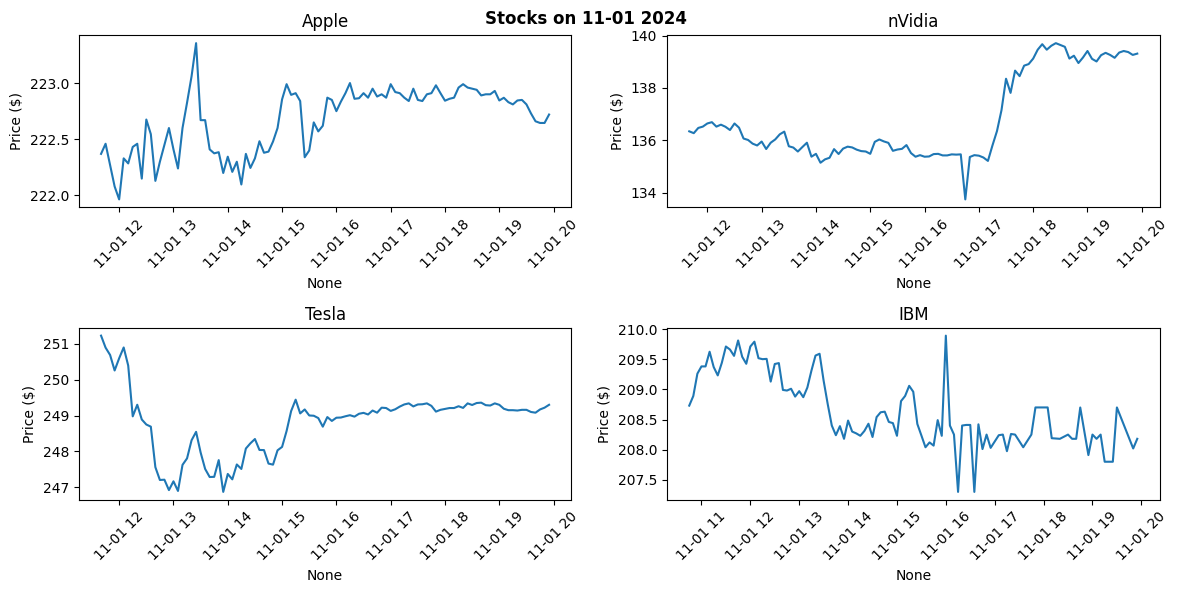

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))
print(repr(axes.flatten()))

stock_names = {"AAPL": "Apple", "NVDA": "nVidia", "TSLA":"Tesla", "IBM":"IBM"}
for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(stocks, x=stocks.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price ($)")

fig.tight_layout()
fig.suptitle("Stocks on 11-01 2024", fontweight="bold")